# install upgrade libraries 

In [3]:
!pip install --upgrade --user numpy matplotlib scikit-learn tensorflow

  Using cached numpy-1.26.3-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached matplotlib-3.8.2-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached scikit_learn-1.3.2-cp39-cp39-win_amd64.whl (9.3 MB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
  Using cached contourpy-1.2.0-cp39-cp39-win_amd64.whl (181 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)


# Import libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU

# Load the dataset and view the dataset 

In [35]:
df = pd.read_csv('./data1/stocks.csv')

In [36]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [37]:
df.head(6)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
5,AAPL,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600


In [38]:
df.head(15)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
5,AAPL,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
6,AAPL,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65573800
7,AAPL,2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900
8,AAPL,2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59144100
9,AAPL,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200


In [39]:
df.head(16)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
5,AAPL,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
6,AAPL,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65573800
7,AAPL,2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900
8,AAPL,2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59144100
9,AAPL,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200


# Data Preprocessing without reshape, LSTM input and time_step

In [40]:
# Use only 'Close' prices for simplicity
data = df['Close'].values.reshape(-1, 1)

In [41]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [42]:
# Create training data
training_data_len = int(np.ceil(len(data) * .95))
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Print x_train and y_train
print("\nTraining data of x_train:\n")
print(x_train)

print("\nTraining data of y_train:\n")
print(y_train)



Training data of x_train:

[[0.23533227 0.22549374 0.22170967 ... 0.289174   0.28538993 0.28146173]
 [0.22549374 0.22170967 0.22221421 ... 0.28538993 0.28146173 0.27547931]
 [0.22170967 0.22221421 0.23244922 ... 0.28146173 0.27547931 0.30351742]
 ...
 [0.84247516 0.85051181 0.85998999 ... 0.05719332 0.0678968  0.0724737 ]
 [0.85051181 0.85998999 0.86373793 ... 0.0678968  0.0724737  0.06151795]
 [0.85998999 0.86373793 0.84042093 ... 0.0724737  0.06151795 0.05683294]]

Training data of y_train:

[0.27547931 0.30351742 0.64224451 0.63925335 0.62804528 0.62617131
 0.65579507 0.65885838 0.64858735 0.6227476  0.60800781 0.58858299
 0.58440249 0.59615112 0.57614967 0.57953731 0.57687043 0.56551828
 0.58296097 0.59802509 0.6037192  0.59391669 0.59229496 0.58732167
 0.57387922 0.59308781 0.61784639 0.63460434 0.67338194 0.68502235
 0.6590746  0.66466055 0.65929082 0.67864355 0.68913081 0.67403061
 0.66988619 0.68891459 0.70167218 0.7169886  0.71313255 0.71295229
 0.70271734 0.72888142 0.720916

# Data Preprocessing with reshape, LSTM input and time_step

In [43]:
# Selecting the 'Close' column for prediction
close_prices = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Creating time steps for LSTM input
def create_dataset(data, time_step=60):
    X_data, y_data = [], []
    for i in range(len(data) - time_step - 1):
        X_data.append(data[i:(i + time_step), 0])
        y_data.append(data[i + time_step, 0])
    return np.array(X_data), np.array(y_data)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshaping data to the format required by LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Splitting data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

print("\nTraining Data Shape:")
print(X_train.shape, y_train.shape)
print("\nTesting Data Shape:")
print(X_test.shape, y_test.shape)



Training Data Shape:
(149, 60, 1) (149,)

Testing Data Shape:
(38, 60, 1) (38,)


# LSTM Model Creation

In [45]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")

# Initialize the LSTM model
model = Sequential()

# Adding LSTM layers and Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compile the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Training

In [46]:
!pip install --upgrade tensorflow

In [47]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Print training history (optional)
print(history.history)


Epoch 1/100
5/5 [==============================] - 3s 52ms/step - loss: 0.2058
Epoch 2/100
5/5 [==============================] - 0s 48ms/step - loss: 0.0766
Epoch 3/100
5/5 [==============================] - 0s 46ms/step - loss: 0.0523
Epoch 4/100
5/5 [==============================] - 0s 46ms/step - loss: 0.0587
Epoch 5/100
5/5 [==============================] - 0s 45ms/step - loss: 0.0397
Epoch 6/100
5/5 [==============================] - 0s 46ms/step - loss: 0.0390
Epoch 7/100
5/5 [==============================] - 0s 45ms/step - loss: 0.0427
Epoch 8/100
5/5 [==============================] - 0s 45ms/step - loss: 0.0385
Epoch 9/100
5/5 [==============================] - 0s 44ms/step - loss: 0.0417
Epoch 10/100
5/5 [==============================] - 0s 50ms/step - loss: 0.0344
Epoch 11/100
5/5 [==============================] - 0s 45ms/step - loss: 0.0320
Epoch 12/100
5/5 [==============================] - 0s 45ms/step - loss: 0.0304
Epoch 13/100
5/5 [==============================]

# Making Predictions and Visualization

2/2 [==============================] - 1s 13ms/step


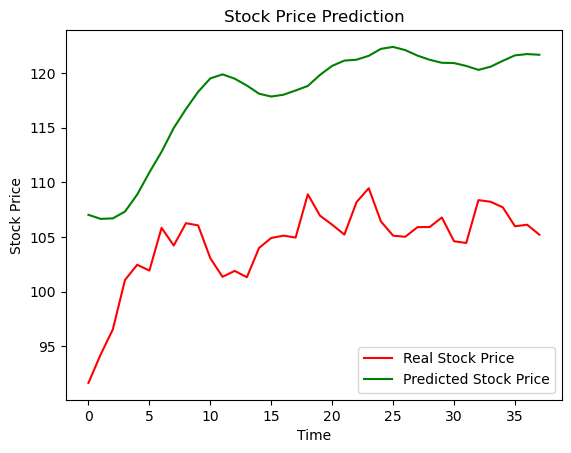

In [48]:


# Making predictions
predicted_df = model.predict(X_test)
predicted_df = scaler.inverse_transform(predicted_df)

# Inverse transform to get actual prices
real_df = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualizing the results
plt.plot(real_df, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_df, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# Adding More Indicators 

In [49]:
# Example: Calculating Moving Average
def moving_average(data, window_size=5):
    return data['Close'].rolling(window=window_size).mean()

# Example: Calculating RSI
def relative_strength_idx(data, window_size=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window_size).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window_size).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

In [50]:
df = pd.read_csv('./data1/stocks.csv')
df['MA_5'] = moving_average(df, 5)
df['RSI'] = relative_strength_idx(df, 14)

print("Data with Indicators:")
print(df.head())

Data with Indicators:
  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume        MA_5  RSI  
0  154.414230  83322600         NaN  NaN  
1  151.688400  64120100         NaN  NaN  
2  150.639999  56007100         NaN  NaN  
3  151.009995  57450700         NaN  NaN  
4  153.850006  62199000  152.459998  NaN  


# Using a More Complex Model Architecture with tensorflow

In [51]:
# More complex LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru (GRU)                   (None, 60, 50)            15300     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

# Hyper - parameter Tuning

In [52]:
from tensorflow.keras.optimizers import Adam

# Hyperparameter tuning
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Adjusting epochs and batch size
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)
print("\nTraining History with New Hyperparameters:")
print(history.history)


Epoch 1/50
3/3 [==============================] - 7s 83ms/step - loss: 0.4315
Epoch 2/50
3/3 [==============================] - 0s 73ms/step - loss: 0.1642
Epoch 3/50
3/3 [==============================] - 0s 74ms/step - loss: 0.0825
Epoch 4/50
3/3 [==============================] - 0s 72ms/step - loss: 0.0797
Epoch 5/50
3/3 [==============================] - 0s 73ms/step - loss: 0.0537
Epoch 6/50
3/3 [==============================] - 0s 72ms/step - loss: 0.0665
Epoch 7/50
3/3 [==============================] - 0s 76ms/step - loss: 0.0621
Epoch 8/50
3/3 [==============================] - 0s 79ms/step - loss: 0.0515
Epoch 9/50
3/3 [==============================] - 0s 71ms/step - loss: 0.0443
Epoch 10/50
3/3 [==============================] - 0s 78ms/step - loss: 0.0519
Epoch 11/50
3/3 [==============================] - 0s 79ms/step - loss: 0.0451
Epoch 12/50
3/3 [==============================] - 0s 75ms/step - loss: 0.0434
Epoch 13/50
3/3 [==============================] - 0s 81ms/st

# Incorporating Dropout for Regularization

In [53]:
# Adding Dropout for regularization
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))  # Increased dropout rate
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_13 (Dropout)        (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Inferno Heatmap

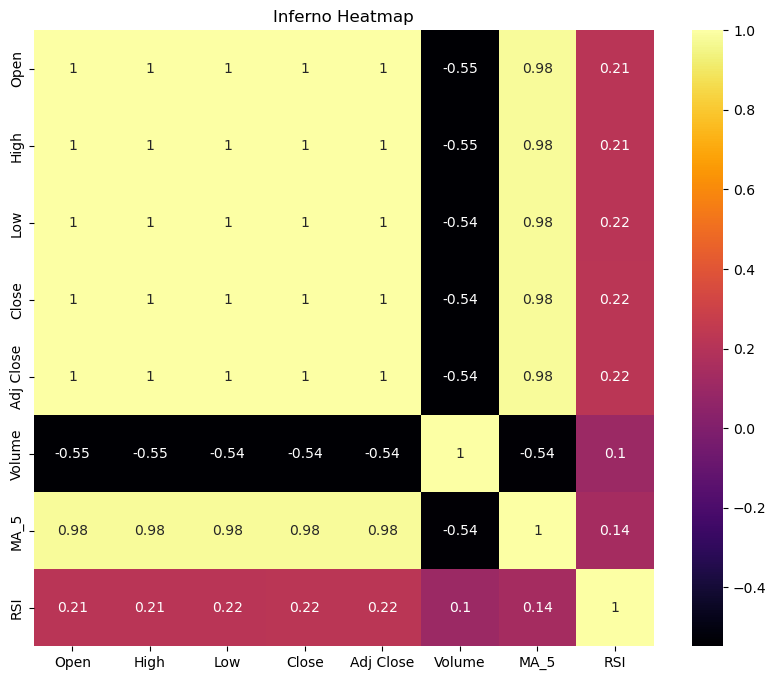

In [54]:
import seaborn as sns

# Exclude non-numeric columns for correlation calculation
numeric_data = df.select_dtypes(include=[np.number])

# Calculate correlation
correlation = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='inferno')
plt.title('Inferno Heatmap')
plt.show()


# Model Loss During Training Graph 

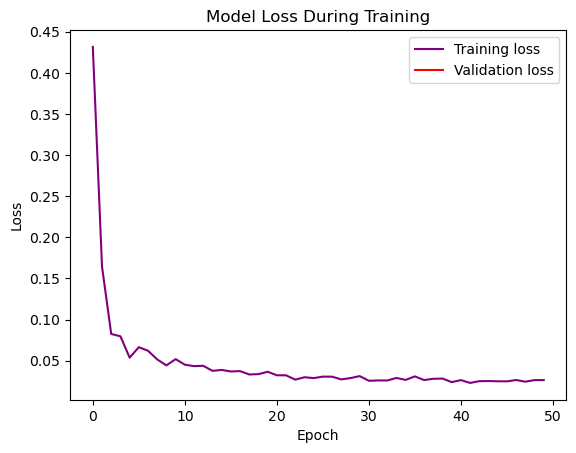

In [59]:
# Assuming 'history' contains the training history of your model
plt.plot(history.history['loss'], label='Training loss', color = 'purple')
plt.plot(history.history.get('val_loss', []), label='Validation loss', color='red')  # Provide color as a separate argument
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Time Series Decomposition

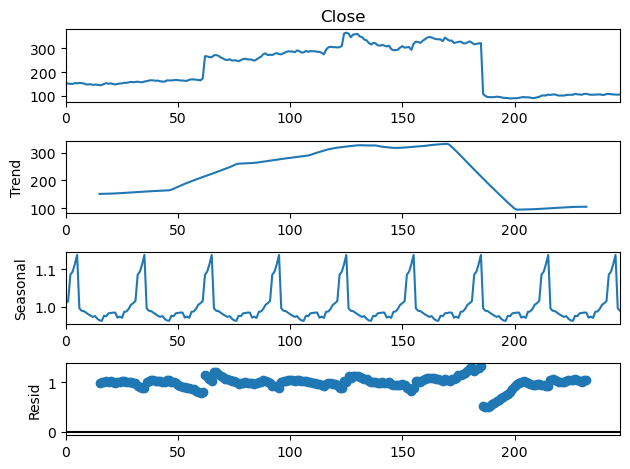

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the 'Close' price time series
result = seasonal_decompose(df['Close'], model='multiplicative', period=30)

# Plotting the decomposition
result.plot()
plt.show()


# Cross-Validation for Time Series

In [65]:

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train_cv, X_test_cv = X[train_index], X[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

    # Fit your LSTM model here on X_train_cv, y_train_cv
    # ...

    # Make predictions
    predictions = model.predict(X_test_cv)
    mse = mean_squared_error(y_test_cv, predictions)
    print(f'MSE for fold: {mse}')

1/1 [==============================] - 2s 2s/step
MSE for fold: 0.37647556483716776
1/1 [==============================] - 0s 88ms/step
MSE for fold: 0.5308464844252109
1/1 [==============================] - 0s 86ms/step
MSE for fold: 0.5525431135853691
1/1 [==============================] - 0s 80ms/step
MSE for fold: 0.017887100809351835
1/1 [==============================] - 0s 82ms/step
MSE for fold: 0.0025605770453735904


# Residual Analysis


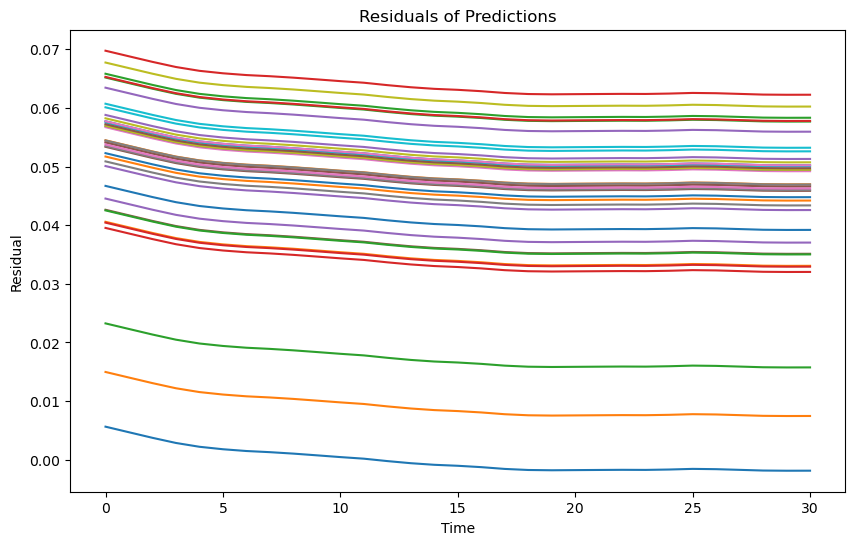

In [68]:
# Assuming you have made predictions with your model
residuals = y_test - predictions

plt.figure(figsize=(10,6))
plt.plot(residuals )
plt.title('Residuals of Predictions')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

# Model Uncertainty with Monte Carlo Dropout

In [70]:

def predict_with_uncertainty(model, X, n_iter=100):
    predictions = np.array([model.predict(X) for _ in range(n_iter)])
    # Ensure predictions are 1-dimensional
    predictions = predictions.squeeze()
    mean_pred = predictions.mean(axis=0)
    std_pred = predictions.std(axis=0)
    return mean_pred, std_pred

mean_pred, std_pred = predict_with_uncertainty(model, X_test)




2/2 [==============================] - 0s 22ms/step


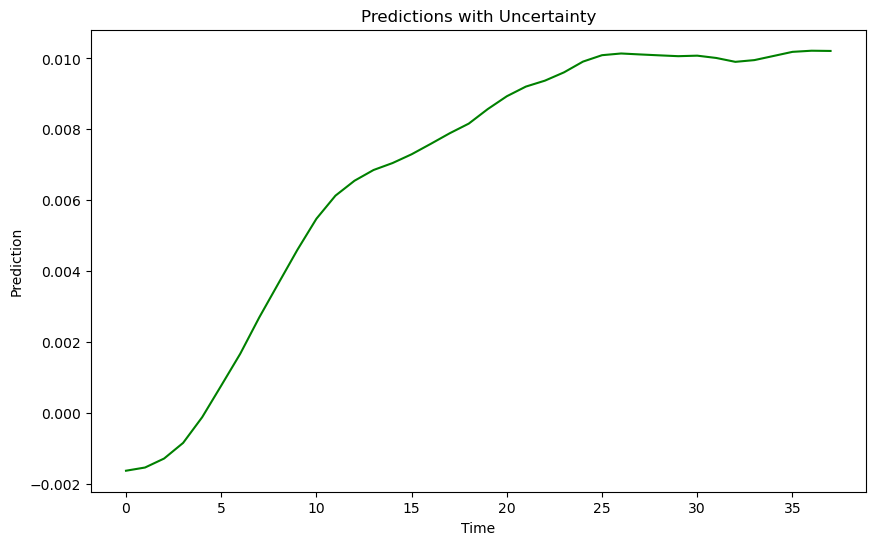

In [71]:
# Plotting predictions with uncertainty
plt.figure(figsize=(10, 6))
plt.fill_between(range(len(mean_pred)), mean_pred - std_pred, mean_pred + std_pred, alpha=0.2)
plt.plot(range(len(mean_pred)), mean_pred, color='green')
plt.title('Predictions with Uncertainty')
plt.xlabel('Time')
plt.ylabel('Prediction')
plt.show()

#  END